In [1]:
import os
from dotenv import load_dotenv

load_dotenv()
os.environ["HF_HUB_DISABLE_PROGRESS_BARS"] = "1"

from dualneuron.screening.sets import ImagenetImages, RenderedImages
from dualneuron.screening.run import activations

from dualneuron.screening.visualize import (
    compute_population_statistics,
    plot_population_statistics,
    plot_neuron_activation,
    plot_neuron_poles,
)

from pathlib import Path
import dualneuron
import numpy as np

import matplotlib.pyplot as plt

token = os.getenv("HF_TOKEN")
data_dir = os.getenv("DATA_DIR")

In [2]:
if False:
    activations(
        data_dir=data_dir + "datasets",
        output_dir=data_dir + "dryad",
        token=token, 
        split='test', 
        dataset="imagenet", 
        area='v4',
        layer='features',
        ensemble=False,
        batch_size=32,
        num_workers=0,
    )

In [3]:
model_name = "V4ColorTaskDriven"
package_dir = Path(dualneuron.__file__).parent
mask_path = package_dir / "twins" / model_name / "mask.npy"
mask = np.load(mask_path)

In [4]:
dset = ImagenetImages(
    data_dir=data_dir + "datasets",
    token=token,
    split='test',
    use_center_crop=True,
    use_resize_output=True,
    use_grayscale=False,
    use_normalize=False,
    use_mask=True,
    use_norm=False,
    use_clip=False,
    mask=mask,
    num_channels=3,
    output_size=(224, 224),
    crop_size=236,
    bg_value=0.0,
    norm=None,
)

Resolving data files:   0%|          | 0/294 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/28 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/294 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/28 [00:00<?, ?it/s]

Loading dataset shards:   0%|          | 0/24 [00:00<?, ?it/s]

In [5]:
idx_dir = data_dir + "dryad/v4_features_imagenet_ordered_indices"
resp_dir = data_dir + "dryad/v4_features_imagenet_ordered_responses"

num_neurons = len([f for f in os.listdir(resp_dir) if f.endswith('.npy')])
print(f"Number of .npy files in resp_dir: {num_neurons}")

Number of .npy files in resp_dir: 1024


In [6]:
response_stats, active_neurons = compute_population_statistics(resp_dir)

Computing neuron statistics:   0%|          | 0/1024 [00:00<?, ?it/s]

Computing neuron statistics: 100%|██████████| 1024/1024 [00:12<00:00, 84.10it/s]

Active neurons: 220 / 1024 (21.5%)


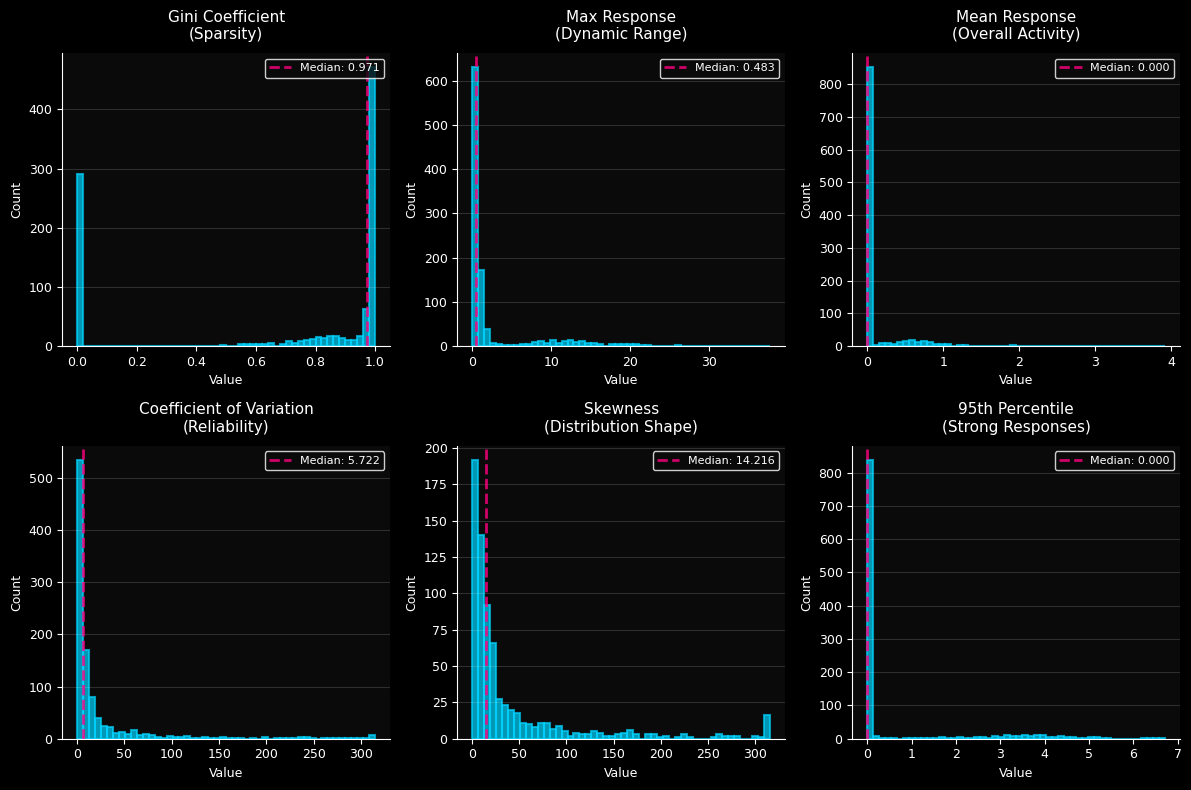

In [7]:
plot_population_statistics(response_stats)

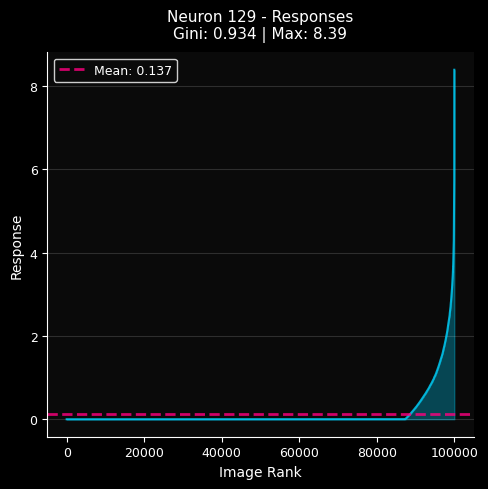

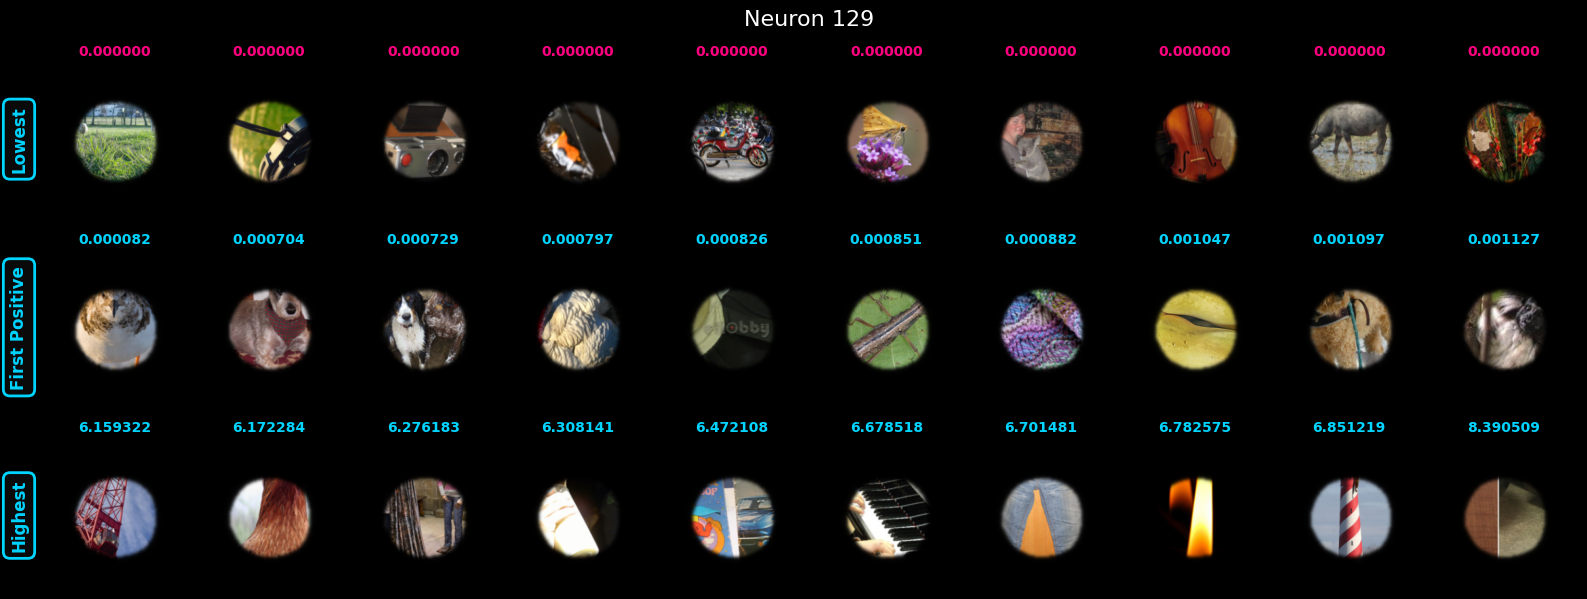

In [28]:
unit = 12
plot_neuron_activation(active_neurons[unit], resp_dir, response_stats)
plot_neuron_poles(active_neurons[unit], dset, resp_dir, idx_dir)